# Experimenting With Booking Hotel Data in Bilbao

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from bokeh.models import ColumnDataSource
import googlemaps
from scipy import stats

In [318]:
df = pd.read_csv("./data/Booking.com _ Hotels in Bilbao . Book your hotel now.csv")

In [319]:
df.head()

,Title,Image,_cff98816f_URL,af1ddfc958,af1ddfc9581,_cff98816f,_cff98816f2,_9c5f726ff,_9c5f726ff3,_4abc4c3d5,...,_c5d12bf22,_2075f7b46__divcontains_class__4abc4c3d5,_3abe99b47,_acf74ef4b,a466256aae,_4abc4c3d54,fde444d7ef,_4abc4c3d55,_4310f7077,Text
0,La Estrella Ostatu,https://t-cf.bstatic.com/xdata/images/hotel/sq...,https://www.booking.com/hotel/es/la-estrella-o...,"Old Town, Bilbao",Show on map,0.8 miles from centre,Metro access,7.9,Good,982 reviews,...,Single Room,1 single bed,FREE cancellation • No prepayment needed,"You can cancel later, so lock in this great pr...",Only 1 room left at this price on our site,"4 nights, 1 adult",£185,Includes taxes and charges,See availability,"\nMaria Muñoz 6, 1º, 48005 Bilbao, Spain\n"
1,LATROUPE LA GRANJA,https://t-cf.bstatic.com/xdata/images/hotel/sq...,https://www.booking.com/hotel/es/latroupe-la-g...,"Ensanche, Bilbao",Show on map,0.4 miles from centre,Metro access,9.1,Superb,"1,096 reviews",...,Bed in 8-Bed Mixed Dormitory Room,Bed in dormitory,NaN,NaN,Only 6 beds left at this price on our site,"4 nights, 1 adult",£107,Includes taxes and charges,See availability,"\n3 Plaza Biribila, 48001 Bilbao, Spain\n"
2,Quartier Bilbao Hostel,https://t-cf.bstatic.com/xdata/images/hotel/sq...,https://www.booking.com/hotel/es/quartier-bilb...,"Old Town, Bilbao",Show on map,0.7 miles from centre,Metro access,8.3,Very good,"1,330 reviews",...,Bed in 4-Bed Female Dormitory Room,Bed in dormitory,FREE cancellation • No prepayment needed,"You can cancel later, so lock in this great pr...",Only 1 bed left at this price on our site,"4 nights, 1 adult",£84,Includes taxes and charges,See availability,"\nArtekale Kalea 15, 48005 Bilbao, Spain\n"
3,Bilbao Central Hostel,https://t-cf.bstatic.com/xdata/images/hotel/sq...,https://www.booking.com/hotel/es/bilbao-centra...,"Ensanche, Bilbao",Show on map,0.3 miles from centre,Metro access,7.6,Good,973 reviews,...,Single Bed in Dormitory Room,Bed in dormitory,FREE cancellation • No prepayment needed,"You can cancel later, so lock in this great pr...",NaN,"4 nights, 1 adult",£60,Includes taxes and charges,See availability,"\nFernández del Campo, 24, 48010 Bilbao, Spain\n"
4,Habitación Bilbao Centro con aire acondicionado,https://t-cf.bstatic.com/xdata/images/hotel/sq...,https://www.booking.com/hotel/es/bed-amp-break...,"Ensanche, Bilbao",Show on map,0.3 miles from centre,NaN,9.2,Superb,98 reviews,...,Single Room,1 single bed,Free cancellation,"You can cancel later, so lock in this great pr...",Only 1 room left at this price on our site,"4 nights, 1 adult",£170,Includes taxes and charges,See availability,"\nAlameda San Mamés 10-principal derecha, 4801..."


In [320]:
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="http")
api_key ="YOUR API KEY
gmaps_client = googlemaps.Client(key=api_key)

In [321]:
def clean_data_bilbao(df):
    #LOCATION NAMES
    df = df.replace("Bilbao City Centre, Bilbao", "City Center")
    df = df.replace("Deusto, Bilbao", "Deusto")
    df = df.replace("Ensanche, Bilbao", "Ensanche")
    df = df.replace("Old Town, Bilbao", "Old Town")

    
    # COLUMN NAMES
    df.columns = ["Title", "Image", "URL", "Location", "show map", \
                  "Distance", "Metro", "Review_Score", "Review_Score_",\
                  "N_Reviews", "blank", "Room_Type", "Room_Type2", \
                  "Cancel", "Cancel2", "Rooms_Left", "length_stay", "Price",\
                  "tax", "Details2", "address"]
    
    df = df[["Title", "Location",  \
                  "Distance", "Metro", "Review_Score", "Review_Score_",\
                  "N_Reviews", "Room_Type", "Room_Type2", \
                   "Price", "address"]]
    
    #PRICE
    df["Price"] = [int(i[1:].replace(",", "")) for i in df["Price"]]


    #N REVIEWS
    l = []
    for (i, na) in zip(df["N_Reviews"], df["N_Reviews"].isna()):
        if na == True:
            l.append(np.nan)
        elif " external" in i:
            l.append(int(i.split(" external")[0].replace(",", "")))
        else:
#             print(i)
            l.append(int(i.split(" reviews")[0].replace(",", "")))

    
    df["N_Reviews"] = l
    
    # DISTANCE
    l_dist = []
    for i in df["Distance"]:
        if " miles" in i:
            l_dist.append(float(i.split(" miles")[0]))
        elif " yards" in i:
            l_dist.append(float(i.split(" yards")[0])/1760) # yards in mile
    df["Distance"] = l_dist
    
    
    
    
    # COORDINATES
    df["address"] = [i[1:-1] for i in df["address"]]
    
    cords = []
    for address in df["address"]:
        print(address)
        location = gmaps_client.geocode(address)
        try:
            cords.append([location[0]["geometry"]["location"]["lat"], location[0]["geometry"]["location"]["lng"]])
        except:
            cords.append([np.nan,np.nan])
    cords = np.array(cords)
    
    df["latitude"] = cords[:, 0]
    df["longitude"] = cords[:, 1]
    return(df)

In [322]:
df = clean_data_bilbao(df)

Maria Muñoz 6, 1º, 48005 Bilbao, Spain
3 Plaza Biribila, 48001 Bilbao, Spain
Artekale Kalea 15, 48005 Bilbao, Spain
Fernández del Campo, 24, 48010 Bilbao, Spain
Alameda San Mamés 10-principal derecha, 48010 Bilbao, Spain
Santiago Brouard Kalea 5- 1ºB, 48012 Bilbao, Spain
Areiltza Doktorearen Zumarkalea 58, Bajo, 48010 Bilbao, Spain
Campo Volantín, 28, 48005 Bilbao, Spain
Rodríguez Arias, 66, 48013 Bilbao, Spain
Mazarredo Zumarkalea, 48009 Bilbao, Spain
Calle Pérez Galdós, 56, 48013 Bilbao, Spain
Amistad, 2, 48001 Bilbao, Spain
40 Gabriel Aresti Hiribidea Gabriel Aresti Hiribidea 40, 48004 Bilbao, Spain
Heros Kalea 7, 48009 Bilbao, Spain
Colón de Larreategui, 9, 48001 Bilbao, Spain
Ercilla, 37-38, 48011 Bilbao, Spain
Lehendakari Leizaola, 29, 48001 Bilbao, Spain
Bidebarrieta, 3, 48005 Bilbao, Spain
Calle Clara Campoamor, 10, 48013 Bilbao, Spain
Kirikiño Etorbidea Nº 1, 48012 Bilbao, Spain
Alameda de Urquijo, 13, 48008 Bilbao, Spain
Los Fueros, 2, 48005 Bilbao, Spain
ALM SAN MAMES 0016 0

In [327]:
df.columns

Index(['Location', 'Distance', 'Review_Score', 'Review_Score_', 'N_Reviews',
       'Price', 'latitude', 'longitude'],
      dtype='object')

In [330]:
df = df.drop(["Title", "address", "Room_Type", "Room_Type2", "Metro"], axis = 1)

In [331]:
df.to_csv("./data/processed_data.csv")

## Anonymizing Data

In [332]:
from DataSynthesizer.DataDescriber import DataDescriber
from DataSynthesizer.DataGenerator import DataGenerator
from DataSynthesizer.ModelInspector import ModelInspector
from DataSynthesizer.lib.utils import read_json_file, display_bayesian_network

import pandas as pd
import os

In [565]:
# input dataset
input_data = './data/processed_data.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = f'./out/{mode}/description.json'
synthetic_data = f'./out/{mode}/sythetic_data.csv'
# open('description.json', 'w', encoding='UTF8')
# open('sythetic_data.csv', 'w', encoding='UTF8')
try:
    os.makedirs("./out/{}/".format(mode))
except:
    print("Folder already exists")

Folder already exists


In [566]:
# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 20

# specify categorical attributes
categorical_attributes = {'Location' : True, 'Distance':False, 'Review_Score':False, 'Review_Score_':True,
       'N_Reviews': False, 'Price': False, 'latitude':False, 'longitude': False}

# specify which attributes are candidate keys of input dataset.
candidate_keys = {'ssn': True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 500

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 3000 # Here 32561 is the same as input dataset, but it can be set to another number.

In [567]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT latitude
Adding attribute longitude
Adding attribute Price
Adding attribute Review_Score
Adding attribute N_Reviews
Adding attribute Review_Score_
Adding attribute Distance
Adding attribute Location
========================== BN constructed ==========================


In [568]:
display_bayesian_network(describer.bayesian_network)

Constructed Bayesian network:
    longitude     has parents ['latitude'].
    Price         has parents ['longitude', 'latitude'].
    Review_Score  has parents ['Price', 'latitude'].
    N_Reviews     has parents ['Price', 'longitude'].
    Review_Score_ has parents ['Review_Score', 'longitude'].
    Distance      has parents ['Review_Score', 'longitude'].
    Location      has parents ['Review_Score', 'longitude'].


In [569]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [570]:
df = pd.read_csv("./out/{}/sythetic_data.csv".format(mode), index_col = 0)

In [571]:
df["Title"] = ["Hotel " + str(i) for i in range(len(df))]
df["address"] = ["Address " + str(i) for i in range(len(df))]

In [618]:
df.head()

,Location,Distance,Review_Score,Review_Score_,N_Reviews,Price,latitude,longitude,Title,address,price_scaled,color
Unnamed: 0,,,,,,,,,,,,
582,Bilbao,1.924177,7.302357,Fabulous,149.0,1424.0,43.259888,-2.932455,Hotel 582,Address 582,10.684051,blue
1118,Deusto,1.492162,7.323643,Good,70.0,422.0,43.277178,-2.957146,Hotel 1118,Address 1118,6.430564,green
2931,Deusto,1.187380,8.988693,Review score,2272.0,241.0,43.278474,-2.947963,Hotel 2931,Address 2931,5.662220,green
1023,Deusto,1.069417,7.825066,NaN,2743.0,1422.0,43.277052,-2.956350,Hotel 1023,Address 1023,10.675561,green
440,Old Town,0.670182,8.363653,Very good,5622.0,510.0,43.258579,-2.922902,Hotel 440,Address 440,6.804124,orange


In [619]:
df[["Title", "address", "Location", "Distance", "Review_Score", "Price", "latitude", "longitude"]]

,Title,address,Location,Distance,Review_Score,Price,latitude,longitude
Unnamed: 0,,,,,,,,
582,Hotel 582,Address 582,Bilbao,1.924177,7.302357,1424.0,43.259888,-2.932455
1118,Hotel 1118,Address 1118,Deusto,1.492162,7.323643,422.0,43.277178,-2.957146
2931,Hotel 2931,Address 2931,Deusto,1.187380,8.988693,241.0,43.278474,-2.947963
1023,Hotel 1023,Address 1023,Deusto,1.069417,7.825066,1422.0,43.277052,-2.956350
440,Hotel 440,Address 440,Old Town,0.670182,8.363653,510.0,43.258579,-2.922902
...,...,...,...,...,...,...,...,...
878,Hotel 878,Address 878,Deusto,1.472836,7.311531,454.0,43.277611,-2.957206
774,Hotel 774,Address 774,Deusto,1.428702,7.361966,474.0,43.276906,-2.956666
1989,Hotel 1989,Address 1989,Deusto,1.449678,7.347720,449.0,43.276283,-2.956812


In [620]:
df_analysis_bil = df[["Distance", "Review_Score", "N_Reviews", "Price", "latitude", "longitude"]]
df_analysis_bil=(df_analysis_bil-df_analysis_bil.min())/(df_analysis_bil.max()-df_analysis_bil.min())

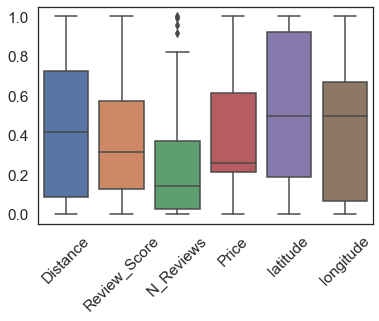

In [621]:
sns.boxplot(data=df_analysis_bil)
plt.xticks(rotation = 45)
print()

In [622]:
Q1 = df_analysis_bil.describe().iloc[4]
Q3 = df_analysis_bil.describe().iloc[6]
IQR = Q3 - Q1

df_analysis_bil = df_analysis_bil.loc[(df_analysis_bil > (Q1 - 1.5 * IQR)).all(axis = 1) & (df_analysis_bil < (Q3 + 1.5 * IQR)).all(axis = 1)]


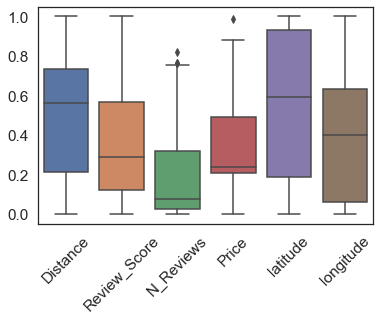

In [623]:
sns.boxplot(data=df_analysis_bil)
plt.xticks(rotation = 45)
print()

<AxesSubplot:>

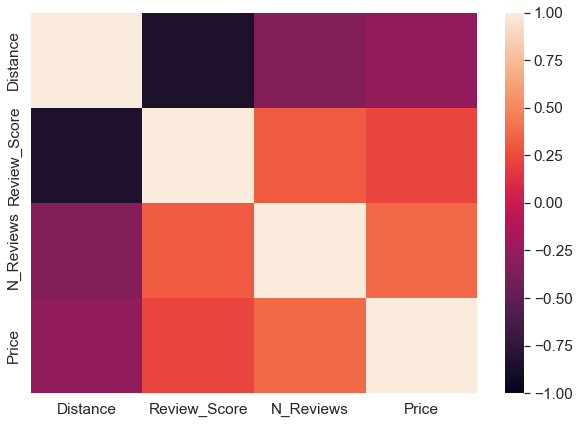

In [624]:
sns. set(font_scale=1.4)
sns.set_style(style='white')
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df[["Distance", "Review_Score", "N_Reviews", "Price"]].corr(method='pearson'), vmin = -1, vmax = 1, ax = ax)


In [625]:
df.corr()

,Distance,Review_Score,N_Reviews,Price,latitude,longitude,price_scaled
Distance,1.000000,-0.851549,-0.337206,-0.268975,0.579751,-0.581231,-0.268975
Review_Score,-0.851549,1.000000,0.312497,0.219607,-0.464982,0.494808,0.219607
N_Reviews,-0.337206,0.312497,1.000000,0.372516,-0.357087,0.390157,0.372516
Price,-0.268975,0.219607,0.372516,1.000000,-0.415340,0.396766,1.000000
latitude,0.579751,-0.464982,-0.357087,-0.415340,1.000000,-0.938563,-0.415340
longitude,-0.581231,0.494808,0.390157,0.396766,-0.938563,1.000000,0.396766
price_scaled,-0.268975,0.219607,0.372516,1.000000,-0.415340,0.396766,1.000000


In [626]:
df.shape

(74, 12)

In [628]:
df1 = df.sample(60)
df2 = df.loc[(df["Review_Score"] > 8) &(df["Distance"] < 1)].sample(60)
df3 = df.loc[(df["Review_Score"] < 8) &(df["Distance"] > 1)].sample(60)

In [591]:
df = pd.concat([df1, df2, df3], axis = 0)

Strong negative correlation between distance from center and rating

Text(0, 0.5, 'Average Review')

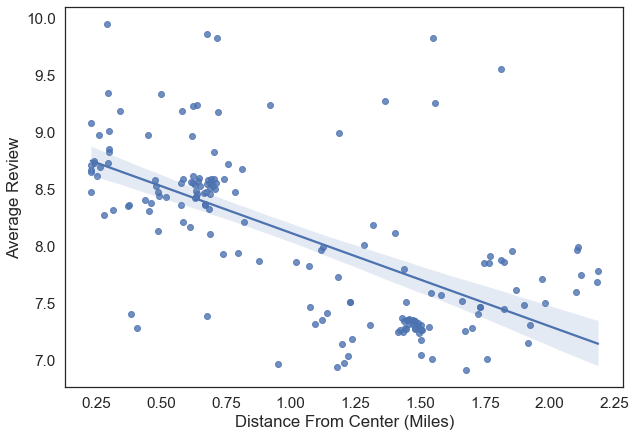

In [592]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.regplot(x="Distance", y="Review_Score", data=df, ax = ax)
# plt.scatter(df["Distance"], df["Review_Score"])
plt.xlabel("Distance From Center (Miles)")
plt.ylabel("Average Review")


In [593]:
df_tsne = df.dropna()

In [594]:
rev = df_tsne["Review_Score_"].values

In [595]:
loc = df_tsne["Location"].values

Text(0, 0.5, 'Number of Hotels')

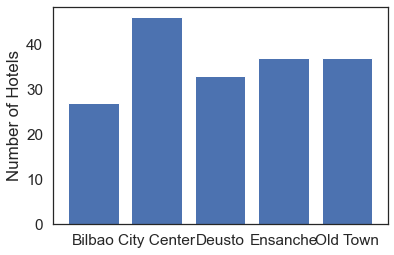

In [596]:
unique = np.unique(df["Location"], return_counts=True)
plt.bar(unique[0], unique[1])
plt.ylabel("Number of Hotels")


In [597]:
price_loc_mean = pd.DataFrame(df.groupby(["Location"]).mean()["Price"]).T
price_loc_std =  pd.DataFrame(df.groupby(["Location"]).std()["Price"]).T
price_loc_std = price_loc_std[price_loc_mean.columns].values[0] #make sure same order cols


In [598]:
price_loc_std

array([599.01307959, 446.28117694, 437.62291996, 430.3123874 ,
       586.05910775])

In [599]:
df[df["Location"] == "City Center"]["Price"].mean()

623.0

In [600]:
d= pd.DataFrame(unique[1]).T
d.columns = unique[0]
d = d[price_loc_mean.columns].values[0]

In [601]:
yerr = price_loc_std / np.sqrt(d)

Text(0, 0.5, 'Price of Hotel for 4 Nights')

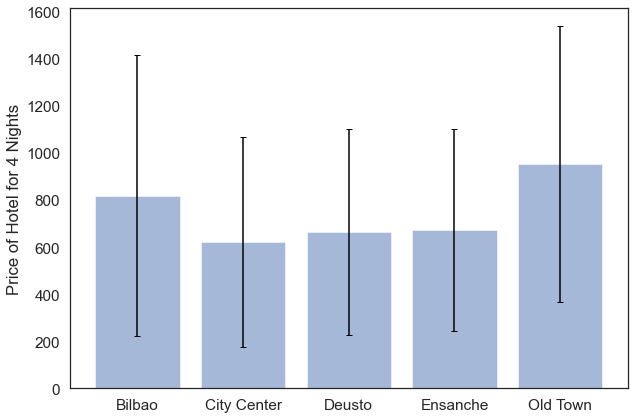

In [602]:
plt.figure(figsize = (10,7))
plt.bar(list(price_loc_mean.columns),  price_loc_mean.values[0],yerr=price_loc_std,align='center', alpha=0.5, ecolor='black', capsize=3)

plt.ylabel("Price of Hotel for 4 Nights")

Text(0, 0.5, 'Price (4 nights)')

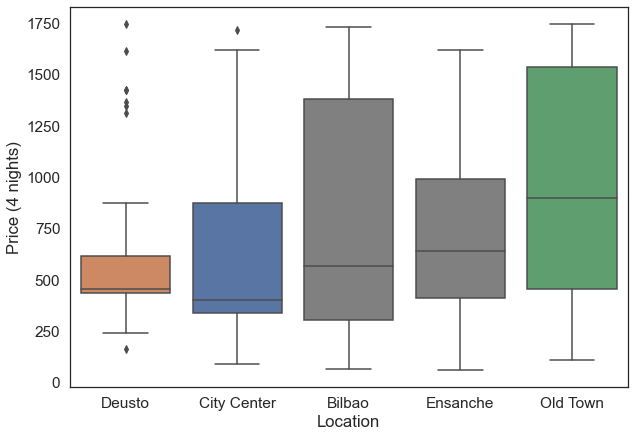

In [603]:
fig, ax = plt.subplots(figsize=(10,7)) 
colors =  ["C1", "C0", "Grey", "Grey", "C2"]
my_pal = {location: colors[index] for index, location in enumerate(df["Location"].unique())}

sns.boxplot(x = "Location", y = "Price", data = df, ax=  ax, palette =my_pal)
plt.ylabel("Price (4 nights)")

## Visualizing Geographical Data

In [604]:
import pandas as pd
from bokeh.io import output_notebook

from bokeh.io import show
from bokeh.plotting import gmap
from bokeh.models import GMapOptions
from bokeh.models import HoverTool


output_notebook()
bokeh_width, bokeh_height = 500,400

Loading BokehJS ...

In [605]:
cords = [[-2.934965, 43.263007], [-2.952913, 43.276330], [-2.919172, 43.259086]]

In [606]:
radii = [0.007, 0.010, 0.005]
names = ["Bilbao", "Deusto", "Old Town"]

In [607]:
df.shape

(180, 10)

In [608]:
l = []
for index, hotel in df.iterrows():
    c = 0
    for city, cord in enumerate(cords):
        dist = np.linalg.norm(cord-hotel[["longitude", "latitude"]])
        
        if dist < radii[city]:
            l.append(names[city])
            break
        else:
            c+= 1
        if c == 3:
            l.append(np.nan)
        

In [609]:
len(l)

180

In [610]:
df["Location"] = l

In [611]:
df = df.loc[df["Location"].notna()]

In [612]:
area1 = pd.DataFrame([[43.268667, -2.932161],
                      [43.267082, -2.936150],
                      [43.263908, -2.938150],
                      [43.265258, -2.945278],
                      [43.258204, -2.947642],
                      [43.257461, -2.932393],
                      [43.263365, -2.924687]
                      
                     ], columns = ["y", "x"])

area2 = pd.DataFrame([[43.263735, -2.923051],                     
                      [43.264648, -2.917621],
                      [43.261680, -2.915767],
                      [43.254929, -2.922856],
                      [43.258676, -2.926598],
                      [43.260857, -2.923985]
                      
                     ], columns = ["y", "x"])

area3 = pd.DataFrame([[43.270275, -2.936454], 
                      [43.266255, -2.951404],
                      [43.265954, -2.959032],
                      [43.287109, -2.967249],
                      [43.280973, -2.943985],
                      [43.272080, -2.941347],
                 
                     ], columns = ["y", "x"])

In [613]:
multiplier = 7
v = df["Price"]
df["price_scaled"] = (multiplier * (v - v.min()) / (v.max() - v.min())) + 5

c_dict = {}
c_dict["Old Town"] = "orange"
c_dict["Bilbao"] = "blue"
# c_dict["Bilbao"] = "grey"
# c_dict["City Center"] = "grey"
c_dict["Deusto"] = "green"

colors = [c_dict[i] for i in df["Location"]]
df["color"] = colors

In [614]:

# import bokeh.plotting as bkp

def plot(lat, lng, zoom=13, map_type='roadmap', alpha = 0.3, bokeh_width = 500, bokeh_height = 400):
    
    hover = HoverTool(
    tooltips = [
        ('Hotel', '@Title'),
        ('Price', '@Price'), 
        ('Location', '@Location'), 
    ]
    )
    
    gmap_options = GMapOptions(lat=lat, lng=lng, 
                               map_type=map_type, zoom=zoom)
    p = gmap(api_key, gmap_options, 
             width=bokeh_width, height=bokeh_height, tools=['reset', 'wheel_zoom', 'pan'])
    source = ColumnDataSource(df)
    center = p.circle("longitude", "latitude", size="price_scaled", alpha=0.5,color = "color", source = source )
    
    g1_hover = bkm.HoverTool(renderers=[center],
                         tooltips = [
                                    ('Hotel', '@Title'),
                                    ('Price', '@Price'), 
                                    ('Location', '@Location'), 
                                ])
    
    p.add_tools(g1_hover)

    
    center = p.patch(area1["x"], area1["y"], alpha=alpha, line_width=2, legend_label = "Bilbao")# "x", y = "y"g, source=source)
    oldtown = p.patch(area2["x"], area2["y"], alpha=alpha, line_width=2, color = "orange", legend_label = "Old Town")# "x", y = "y", source=source)
    duesto = p.patch(area3["x"], area3["y"], alpha=alpha, line_width=2, color = "green", legend_label = "Deusto")# "x", y = "y", source=source)
#     other = p.patch(0, 0, color = "grey", legend_label = "Other")# "x", y = "y", source=source)
    
#     bilbao = p.circle( -2.934965, 43.263007, radius = 1100, line_width=1, fill_alpha = 0.2)
 
    bilbao = p.circle( -2.934965, 43.263007, size = 110, line_width=1, fill_alpha = 0.2)
    deusto = p.circle(-2.952913, 43.276330 , size = 190, line_width=1, fill_alpha = 0.2,  color = "green")
    old_town = p.circle(-2.919172, 43.259086, size = 80, line_width=1, fill_alpha = 0.2,  color = "orange")
    

    show(p)
    return p

In [615]:
lat, lon = 43.262935, -2.935003

In [616]:
p = plot(lat, lon, map_type = "roadmap", bokeh_width = 500, bokeh_height = 400)


## BENIDORM

In [629]:
df_benidorm = pd.read_csv("./data/Booking.com _ Hotels in Benidorm . Book your hotel now! Benidorm.csv")

In [630]:
def clean_data_benidorm(df):


    
    # COLUMN NAMES
    df.columns = ["Title", "Image", "URL", "Location", "show map", \
                  "Distance", "Beach", "Review_Score",\
                  "N_Reviews", "blank", "Room_Type", "Room_Type2", \
                  "Rooms left", "Cancel", "Cancel2", "length_stay", "Price",\
                  "tax", "Details2", "Details3","Details4","address"]
    
    df = df[["Title", "Location",  \
                  "Distance", "Beach", "Review_Score",\
                  "N_Reviews", "Room_Type", "Room_Type2", \
                   "Price", "address"]]
    
    #PRICE
    df["Price"] = [int(i[1:].replace(",", "").replace(".", "")) for i in df["Price"]]


    #N REVIEWS
    l = []
    for (i, na) in zip(df["N_Reviews"], df["N_Reviews"].isna()):
        if na == True:
            l.append(np.nan)
        elif " external" in i:
            l.append(int(i.split(" external")[0].replace(",", "")))
        else:
#             print(i)
            l.append(int(i.split(" reviews")[0].replace(",", "")))
    
    df["N_Reviews"] = l
    
    
    # DISTANCE
    l_dist = []
    for i in df["Distance"]:
        if " miles" in i:
            l_dist.append(float(i.split(" miles")[0]))
        elif " yards" in i:
            l_dist.append(float(i.split(" yards")[0])/1760) # yards in mile
    df["Distance"] = l_dist
    
    # BEACH
    l_beach = []
    for i in df["Beach"]:
        if "Beachfront" in i:
            l_beach.append(0)
        elif " miles" in i:
            l_beach.append(float(i.split(" miles")[0]))
        elif " yards" in i:
            l_beach.append(float(i.split(" yards")[0].replace(",", ""))/1760) # yards in mile
    df["Beach"] = l_beach
    
    
    # COORDINATES
    df["address"] = [i[1:-1] if type(i) != float else np.nan for i in df["address"]]
    
    cords = []
    for address in df["address"]:
        print(address)
        location = gmaps_client.geocode(address)
        try:
            cords.append([location[0]["geometry"]["location"]["lat"], location[0]["geometry"]["location"]["lng"]])
        except:
            cords.append([np.nan,np.nan])
    cords = np.array(cords)
    
    df["latitude"] = cords[:, 0]
    df["longitude"] = cords[:, 1]
    return(df)

In [631]:
df_benidorm = clean_data_benidorm(df_benidorm)

C:\conda_tmp/ipykernel_12812/3497036916.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"] = [int(i[1:].replace(",", "").replace(".", "")) for i in df["Price"]]
C:\conda_tmp/ipykernel_12812/3497036916.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["N_Reviews"] = l
C:\conda_tmp/ipykernel_12812/3497036916.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Calle Santander 12, 03502 Benidorm, Spain
Avenida Foietes, 4, 03502 Benidorm, Spain
Quatre Cantons, 18, 03501 Benidorm, Spain
Passeig dels Tolls, s/n, 03502 Benidorm, Spain
Avenida Andalucia, 2, 03502 Benidorm, Spain
Primavera, 6, 03502 Benidorm, Spain
Esperanto, 1, 03503 Benidorm, Spain
Avenida Martínez Alejos, 2, 03501 Benidorm, Spain
Avenida de los Almendros, 6, 03501 Benidorm, Spain
Mirador, 3, 03501 Benidorm, Spain
AVDA. ESTOCOLMO,17, 03503 Benidorm, Spain
Avenida Mediterraneo,45, 03500 Benidorm, Spain
Alcalde Manuel Catalan Chana 12, 03503 Benidorm, Spain
Plaza San Jaime, 5, 03501 Benidorm, Spain
Vía Emilio Ortuño, 11, 03501 Benidorm, Spain
Ruzafa, 37, 03501 Benidorm, Spain
14 Avenida de los Limones, 03501 Benidorm, Spain
San Pedro, 20, 03501 Benidorm, Spain
Avenida Mediterráneo, 64, 03503 Benidorm, Spain
Avenida Jaime I, 3, 03502 Benidorm, Spain
Condestable Zaragoza, 5, 03501 Benidorm, Spain
Avenida Mediterráneo, 11, 03503 Benidorm, Spain
Jaen, s/n, 03503 Benidorm, Spain
Santa F

C:\conda_tmp/ipykernel_12812/3497036916.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latitude"] = cords[:, 0]
C:\conda_tmp/ipykernel_12812/3497036916.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["longitude"] = cords[:, 1]


In [632]:
df_benidorm = df_benidorm.drop(["Title", "address", "Room_Type", "Room_Type2", "Location"], axis = 1)

In [633]:
df_benidorm.to_csv("./data/processed_data_benidorm.csv")

In [634]:
df_benidorm.head()

,Distance,Beach,Review_Score,N_Reviews,Price,latitude,longitude
0,1.400000,0.056818,8.2,924.0,166,38.533511,-0.158295
1,0.300000,0.312500,7.3,2983.0,151,38.541845,-0.135346
2,0.113636,0.056818,9.1,717.0,177,38.535272,-0.131829
3,1.000000,0.965909,7.9,4379.0,143,38.563703,-0.144818
4,0.600000,0.454545,8.0,286.0,130,38.542680,-0.124968


In [635]:
# input dataset
input_data = './data/processed_data_benidorm.csv'
# location of two output files
mode = 'correlated_attribute_mode'
description_file = f'./out/{mode}/description_benidorm.json'
synthetic_data = f'./out/{mode}/sythetic_data_benidorm.csv'
# open('description.json', 'w', encoding='UTF8')
# open('sythetic_data.csv', 'w', encoding='UTF8')
try:
    os.makedirs("./out/{}/".format(mode))
except:
    print("Folder already exists")

Folder already exists


In [636]:
# An attribute is categorical if its domain size is less than this threshold.
# Here modify the threshold to adapt to the domain size of "education" (which is 14 in input dataset).
threshold_value = 20

# specify categorical attributes
categorical_attributes = {'Distance':False, 'Beach':False, 'Review_Score':False,
       'N_Reviews': False, 'Price': False, 'latitude':False, 'longitude': False}

# specify which attributes are candidate keys of input dataset.
candidate_keys = {'ssn': True}

# A parameter in Differential Privacy. It roughly means that removing a row in the input dataset will not 
# change the probability of getting the same output more than a multiplicative difference of exp(epsilon).
# Increase epsilon value to reduce the injected noises. Set epsilon=0 to turn off differential privacy.
epsilon = 500

# The maximum number of parents in Bayesian network, i.e., the maximum number of incoming edges.
degree_of_bayesian_network = 2

# Number of tuples generated in synthetic dataset.
num_tuples_to_generate = 3000 # Here 32561 is the same as input dataset, but it can be set to another number.

In [637]:
describer = DataDescriber(category_threshold=threshold_value)
describer.describe_dataset_in_correlated_attribute_mode(dataset_file=input_data, 
                                                        epsilon=epsilon, 
                                                        k=degree_of_bayesian_network,
                                                        attribute_to_is_categorical=categorical_attributes,
                                                        attribute_to_is_candidate_key=candidate_keys)
describer.save_dataset_description_to_file(description_file)

================ Constructing Bayesian Network (BN) ================
Adding ROOT longitude
Adding attribute Distance
Adding attribute latitude
Adding attribute Review_Score
Adding attribute N_Reviews
Adding attribute Beach
Adding attribute Price
========================== BN constructed ==========================


In [638]:
generator = DataGenerator()
generator.generate_dataset_in_correlated_attribute_mode(num_tuples_to_generate, description_file)
generator.save_synthetic_data(synthetic_data)

In [639]:
df_benidorm = pd.read_csv("./out/{}/sythetic_data_benidorm.csv".format(mode), index_col = 0)

In [640]:
df_benidorm["Title"] = ["Hotel " + str(i) for i in range(len(df_benidorm))]
df_benidorm["address"] = ["Address " + str(i) for i in range(len(df_benidorm))]

In [641]:
df_benidorm.head()

,Distance,Beach,Review_Score,N_Reviews,Price,latitude,longitude,Title,address
Unnamed: 0,,,,,,,,,
0,0.228676,0.006818,NaN,NaN,771.0,38.534872,-0.128094,Hotel 0,Address 0
1,0.979344,0.335182,9.008425,4424.0,1169.0,38.539258,-0.112768,Hotel 1,Address 1
2,0.074075,0.031721,NaN,NaN,774.0,38.538754,-0.129691,Hotel 2,Address 2
3,0.165102,0.009010,NaN,NaN,165.0,38.534617,-0.128578,Hotel 3,Address 3
4,0.192503,0.065379,7.101026,36.0,986.0,38.539817,-0.131291,Hotel 4,Address 4


<AxesSubplot:xlabel='Beach', ylabel='Price'>

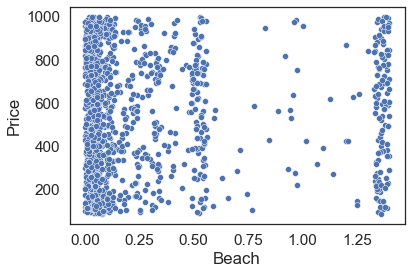

In [656]:
sns.scatterplot(x = "Beach", y = "Price", data = df0)

In [648]:
df_benidorm.columns

Index(['Distance', 'Beach', 'Review_Score', 'N_Reviews', 'Price', 'latitude',
       'longitude', 'Title', 'address'],
      dtype='object')

In [667]:
df0 = df_benidorm.loc[df_benidorm["Price"] < 1000]
df1 = df0.sample(60)
df2 = df0.loc[(df0["Price"] > 600) &(df0["Beach"] < 0.5)].sample(60)
df3 = df0.loc[(df0["Price"] < 600) &(df0["Beach"] > 0.5)].sample(60)

In [676]:
df_benidorm = pd.concat([df1, df2, df3], axis = 0)

<AxesSubplot:xlabel='Beach', ylabel='Price'>

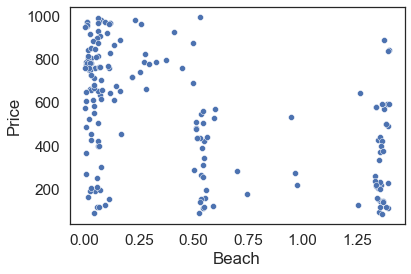

In [677]:
sns.scatterplot(x = "Beach", y = "Price", data = df_test)

In [678]:
df_analysis = df_benidorm[["Distance", "Beach", "Review_Score", "N_Reviews", "Price", "latitude", "longitude"]]

In [679]:
df_analysis=(df_analysis-df_analysis.min())/(df_analysis.max()-df_analysis.min())

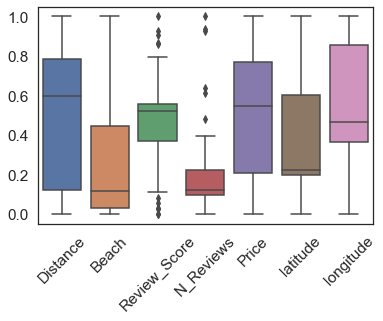

In [680]:
sns.boxplot(data=df_analysis)
plt.xticks(rotation = 45)
print()

In [681]:
Q1 = df_analysis.describe().iloc[4]
Q3 = df_analysis.describe().iloc[6]
IQR = Q3 - Q1

df_analysis2 = df_analysis.loc[(df_analysis > (Q1 - 1.5 * IQR)).all(axis = 1) & (df_analysis < (Q3 + 1.5 * IQR)).all(axis = 1)]


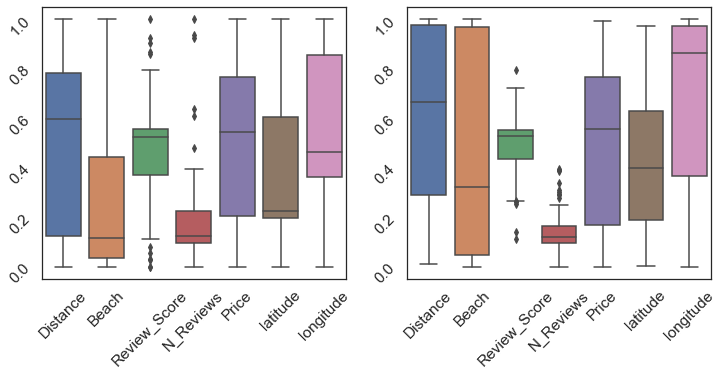

In [682]:
_, ax = plt.subplots(1,2, figsize =  (12, 5))
sns.boxplot(data=df_analysis, ax= ax[0])
ax[0].tick_params(labelrotation=45)

sns.boxplot(data=df_analysis2, ax= ax[1])
ax[1].tick_params(labelrotation=45)
print()

<AxesSubplot:>

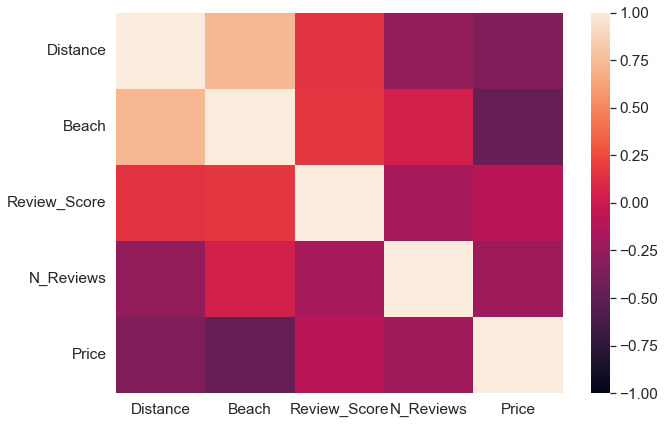

In [683]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df_analysis[["Distance", "Beach", "Review_Score", "N_Reviews", "Price"]].corr(method='pearson'), vmin = -1, vmax = 1, ax = ax)

In [684]:
df_analysis[["Distance", "Beach", "Review_Score", "N_Reviews", "Price"]].corr(method='pearson')

,Distance,Beach,Review_Score,N_Reviews,Price
Distance,1.000000,0.730440,0.141861,-0.262850,-0.347499
Beach,0.730440,1.000000,0.156606,0.041016,-0.470326
Review_Score,0.141861,0.156606,1.000000,-0.179639,-0.092535
N_Reviews,-0.262850,0.041016,-0.179639,1.000000,-0.204079
Price,-0.347499,-0.470326,-0.092535,-0.204079,1.000000


Text(0, 0.5, 'Average Review')

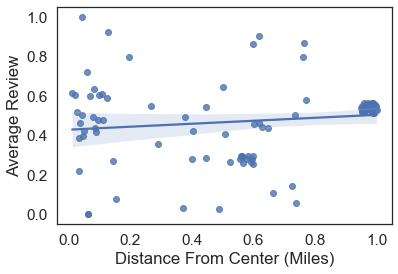

In [685]:
sns.regplot(x="Distance", y="Review_Score", data=df_analysis)
# plt.scatter(df["Distance"], df["Review_Score"])
plt.xlabel("Distance From Center (Miles)")
plt.ylabel("Average Review")


Text(0, 0.5, 'Price')

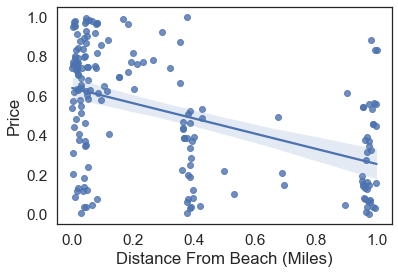

In [686]:
sns.regplot(x="Beach", y="Price", data=df_analysis)
# plt.scatter(df["Distance"], df["Review_Score"])
plt.xlabel("Distance From Beach (Miles)")
plt.ylabel("Price")


In [687]:
df_benidorm_plot = df_benidorm.loc[df_benidorm["Price"] < 5000]

In [688]:
for index, hotel in df_benidorm_plot.iterrows():
    if (hotel["longitude"] < -0.12) & (hotel["longitude"] > -0.15):
        if hotel["latitude"] < 38.536:
            df_benidorm_plot["latitude"][index] = 38.536 + 38.536 - hotel["latitude"] 

C:\conda_tmp/ipykernel_12812/1284290707.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_benidorm_plot["latitude"][index] = 38.536 + 38.536 - hotel["latitude"]


In [689]:
multiplier = 10
v = df_benidorm_plot["Price"]
df_benidorm_plot["price_scaled"] = (multiplier * (v - v.min()) / (v.max() - v.min())) + 5


In [690]:
def plot_beniform(lat, lng, zoom=13, map_type='roadmap', alpha = 0.3):
    
    hover = HoverTool(
    tooltips = [
        ('Hotel', '@Title'),
        ('Price', '@Price'), 
        ('Distance from Center', '@Distance'),
        ('Distance from Beach', '@Beach')
    ]
    )
    gmap_options = GMapOptions(lat=lat, lng=lng, 
                               map_type=map_type, zoom=zoom)
    p = gmap(api_key, gmap_options, 
             width=bokeh_width, height=bokeh_height, tools=[hover, 'reset', 'wheel_zoom', 'pan'])
    
    
    source = ColumnDataSource(df_benidorm_plot)
    center = p.circle("longitude", "latitude", size="price_scaled", alpha=0.8, source = source )
    show(p)
    return p

In [691]:
plot_beniform(38.540976, -0.123626)#, map_type = "satellite")

GMap(id='28970', ...)